In [44]:
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras import layers
from tensorflow.keras import models
import matplotlib.pyplot as plt
import numpy

In [ ]:

batch_size = 32
img_height = 224
img_width = 224

train_dataset = image_dataset_from_directory("Training", labels='inferred', image_size=(img_height, img_width), batch_size=batch_size, shuffle=True)
test_dataset = image_dataset_from_directory("Testing",  labels='inferred',image_size=(img_height, img_width), batch_size=batch_size, shuffle=True)

train_labels = train_dataset.class_names
test_labels = test_dataset.class_names

normalization_layer = layers.Rescaling(1./255)

normalized_train = train_dataset  #Switched to normalization layer in the model itself, but didn't want to change var names everywhere
normalized_test = test_dataset

Found 5712 files belonging to 4 classes.
Found 1311 files belonging to 4 classes.


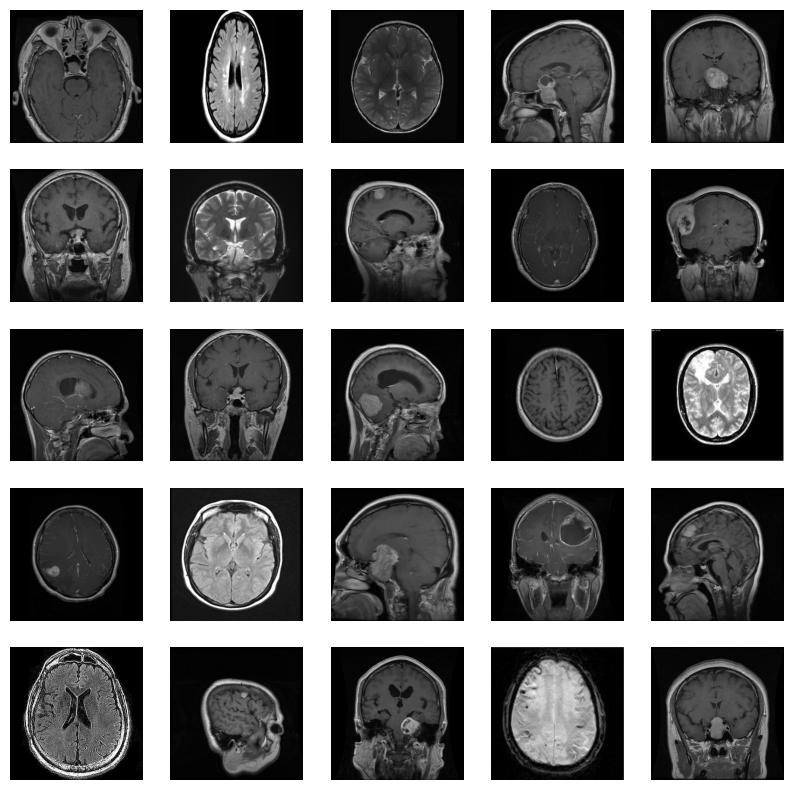

In [56]:
categories = [
    "glioma",
    "meningioma",
    "notumor",
    "pituitary"
]

rescale = layers.Rescaling(1./255)
rescaled_data = normalized_train.map(lambda x, y: (rescale(x), y))
label_np = labels.numpy()
plt.figure(figsize=(10, 10))
for images, labels in rescaled_data.take(1):
    for i in range(25):
        ax = plt.subplot(5, 5, i + 1)
        plt.imshow(images[i].numpy())
        plt.axis("off")
plt.show()

In [ ]:
model = models.Sequential([layers.Input(shape=(224, 224, 3))])
model.add(layers.Rescaling(1./255))

model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.GlobalAveragePooling2D())

model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.3))

model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(4, activation='softmax'))


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(normalized_train, epochs=17)

test_loss, test_accuracy = model.evaluate(normalized_test, verbose=2)

In [ ]:
model.save(r'ModelPath')

In [ ]:
#Converting tensorflow moder to keras

filepath = r"FILEPATH"
model_load = tf.saved_model.load(filepath)

Neuro93Keras = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(224, 224, 3)),  
    tf.keras.layers.Lambda(lambda x: model_load(x))  
])

Neuro93Keras.save('Neuro93Keras.keras', save_format='keras')
